# Data Science Hands-on

**First day**     

At the end of this day we 
- Explore our dataset
- Make some plots to check different variables
- Select interesting features to apply ML algorithms
- Fill missing values
- Transform some feature to more infomative variables

[Pandas cheatsheet](https://github.com/creyesp/houses-project/blob/add-binder-configs/pandas_cheatsheet.md)


## What are some questions that I can answer with this dataset?
Understand your dataset is the fist step of any datascience project. You need to know the limitations and make a list of posible question that could be answering with this dataset. These question can reduce, expande or modify the scope of our project.

examples: 
- We could have great ideas but poor data
- We could have incorect question for our dataset
- We could have a rich dataset ....

**Data**: 
- We have a set of features of houses for sale in a specific time windows.  

**Business question/objective**:
- **New infocasas functionality**: Is it possible to offer an estimated price for selling given house characteristics (uploaded by owner in the webpage) without asking an appraiser? 


# Exploratory data analysis
- How many rows are in our dataset?
- How many columns are in our dataset?
- What data types are in the columns?
- are there missing values in the dataset? Do we infer missing values? how?
- are there outlier values? 

Data types:
- **Numeric**:
    - *Discrete*: variables that have finite posible values.
    - *Continuous*:  variables that can have an infinite number of possible values
- **Categorical, variables that have 2 or more possible values**:
    - *Ordinal*: these values have a meaningful order or rank. Ex. marks, A, B, C
    - *Nominal*: the order of those values have no meaning. Ex, names
    - *Binary or Dichotomous*: only 2 posible values, 1/0
- **Unstructured**:
    - *text*

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom module
import handson

%matplotlib notebook

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None


## Load dataset


In [2]:
path_file = '../data/preprocessed/dataset.csv'

# Read csv file and assign to df variable
df = pd.read_csv(path_file)
df = df.loc[df['precio']< 1.5e6, :]

## General information about our dataset

In [3]:
# Check the neme of columns (features)
df.columns

Index(['acepta_permuta', 'altura_permitida', 'ambientes', 'ambientes_extra',
       'ano_de_construccion', 'aptos_por_piso', 'banos', 'banos_extra',
       'barrio', 'cantidad_de_pisos', 'casco', 'descripcion', 'direccion',
       'disposicion', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra',
       'estado', 'extra', 'financia', 'garajes', 'garajes_extra',
       'gastos_comunes', 'gastos_comunes_moneda', 'hectareas', 'huespedes',
       'inmobiliaria', 'longitud_frente', 'm2_de_la_terraza', 'm2_del_terreno',
       'm2_edificados', 'oficina', 'penthouse', 'piso', 'plantas',
       'plantas_extra', 'precio', 'precio_moneda', 'referencia', 'sobre',
       'tipo_de_publicacion', 'tipo_propiedad', 'titulo_publicacion', 'url',
       'vista_al_mar', 'vivienda_social'],
      dtype='object')

In [4]:
# Look at the first 5 row of our dataset
df.head()

,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,barrio,cantidad_de_pisos,casco,descripcion,direccion,disposicion,distancia_al_mar,dormitorios,dormitorios_extra,estado,extra,financia,garajes,garajes_extra,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,inmobiliaria,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,plantas_extra,precio,precio_moneda,referencia,sobre,tipo_de_publicacion,tipo_propiedad,titulo_publicacion,url,vista_al_mar,vivienda_social
0,nan,nan,nan,nan,nan,nan,3.00,1.00,centro,nan,nan,dueno vende: hermoso apartamento muy amplio so...,"barrios amorin 1279, centro",al frente,nan,3.00,0.00,excelente estado,NaN,nan,nan,nan,4000.00,nan,nan,nan,sara,nan,nan,118.00,120.00,nan,nan,nan,1.00,0.00,200000.00,nan,CE250,otros,venta,apartamentos,"barrios amorin 1279, centro",https://www.infocasas.com.uy/barrios-amorn-127...,nan,nan
1,nan,nan,nan,nan,nan,nan,2.00,0.00,pocitos,nan,nan,casa en pocitos zona iglesia san juan bautista...,NaN,NaN,nan,3.00,0.00,NaN,garaje,nan,1.00,0.00,nan,nan,nan,nan,gerardo,nan,nan,nan,120.00,nan,nan,nan,nan,nan,315000.00,nan,1F407,NaN,venta,casas,casa pocitos 3 dormitorios/cochera (dueno),https://www.infocasas.com.uy/casa-pocitos-3-do...,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,centro,nan,nan,oficinas london vendecochera en 1er pisopadron...,NaN,NaN,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,oficinas london,nan,nan,nan,nan,nan,nan,nan,nan,nan,16500.00,nan,FEA0C,NaN,venta,garaje o cocheras,cochera en centro (san jose y rio negro),https://www.infocasas.com.uy/cochera-en-centro...,nan,nan
3,nan,nan,nan,nan,1991.00,nan,1.00,0.00,punta carretas,nan,nan,av.sarmiento y luis franzini. edificio de cate...,NaN,contrafrente,nan,1.00,0.00,excelente estado,"terraza,se aceptan mascotas,lavadero,barbacoa,...",nan,nan,nan,5000.00,nan,nan,nan,casagrande,nan,nan,nan,45.00,nan,nan,nan,1.00,0.00,150000.00,nan,45F92,NaN,venta,apartamentos,apartamento - punta carretas. impecable!,https://www.infocasas.com.uy/apartamento-punta...,nan,nan
5,nan,nan,nan,nan,2007.00,nan,3.00,1.00,pocitos nuevo,nan,nan,casa pocitos 3 dormitorios (1 en suite) 3 bano...,haedo 2929,NaN,1000.00,3.00,0.00,excelente estado,"wifi,patio,parrillero,garaje,calefaccion,aire ...",nan,1.00,0.00,nan,nan,nan,nan,juan jose,nan,nan,155.00,125.00,nan,nan,nan,2.00,0.00,329000.00,nan,556CB,NaN,venta,casas,cas pocitos 3 dorm (1 sui) 3 ban gge excl pati...,https://www.infocasas.com.uy/cas-pocitos-3-dor...,nan,nan


In [5]:
# Get number of rows and columns
df.shape

(25795, 46)

In [6]:
# Get data types of columns
df.dtypes

acepta_permuta           float64
altura_permitida         float64
ambientes                float64
ambientes_extra          float64
ano_de_construccion      float64
aptos_por_piso           float64
banos                    float64
banos_extra              float64
barrio                    object
cantidad_de_pisos        float64
casco                    float64
descripcion               object
direccion                 object
disposicion               object
distancia_al_mar         float64
dormitorios              float64
dormitorios_extra        float64
estado                    object
extra                     object
financia                 float64
garajes                  float64
garajes_extra            float64
gastos_comunes           float64
gastos_comunes_moneda    float64
hectareas                float64
huespedes                float64
inmobiliaria              object
longitud_frente          float64
m2_de_la_terraza         float64
m2_del_terreno           float64
m2_edifica

In [7]:
# Check if there are missing values in each columns
df.isnull().any()

acepta_permuta            True
altura_permitida          True
ambientes                 True
ambientes_extra           True
ano_de_construccion       True
aptos_por_piso            True
banos                     True
banos_extra               True
barrio                    True
cantidad_de_pisos         True
casco                     True
descripcion               True
direccion                 True
disposicion               True
distancia_al_mar          True
dormitorios               True
dormitorios_extra         True
estado                    True
extra                     True
financia                  True
garajes                   True
garajes_extra             True
gastos_comunes            True
gastos_comunes_moneda     True
hectareas                 True
huespedes                 True
inmobiliaria              True
longitud_frente           True
m2_de_la_terraza          True
m2_del_terreno            True
m2_edificados             True
oficina                   True
penthous

In [8]:
# Get percentage of missing values from each columns
df.notnull().sum() / df.shape[0] * 100

acepta_permuta            3.45
altura_permitida          1.09
ambientes                10.41
ambientes_extra          10.41
ano_de_construccion      61.73
aptos_por_piso           24.50
banos                    95.53
banos_extra              95.53
barrio                   99.66
cantidad_de_pisos        25.07
casco                     0.08
descripcion              99.33
direccion                35.18
disposicion              72.55
distancia_al_mar         19.69
dormitorios              88.19
dormitorios_extra        88.19
estado                   97.14
extra                    81.12
financia                 16.35
garajes                  41.02
garajes_extra            41.02
gastos_comunes           46.78
gastos_comunes_moneda     0.00
hectareas                 0.19
huespedes                 0.00
inmobiliaria             99.74
longitud_frente           1.33
m2_de_la_terraza         27.56
m2_del_terreno           33.01
m2_edificados            92.48
oficina                  12.22
penthous

In [9]:
# Get number of unique values for each feature
df.nunique()

acepta_permuta               1
altura_permitida            25
ambientes                    7
ambientes_extra              2
ano_de_construccion        141
aptos_por_piso              43
banos                        3
banos_extra                  2
barrio                      89
cantidad_de_pisos           38
casco                        1
descripcion              24668
direccion                 6504
disposicion                  4
distancia_al_mar             7
dormitorios                  6
dormitorios_extra            2
estado                       7
extra                    13610
financia                     1
garajes                     18
garajes_extra                2
gastos_comunes             884
gastos_comunes_moneda        0
hectareas                   19
huespedes                    1
inmobiliaria              1011
longitud_frente             82
m2_de_la_terraza           244
m2_del_terreno            1123
m2_edificados              742
oficina                      1
penthous

## Statistic resume
### Numeric variables
Look at statistic info for each columns and check which columns has unusual behavior. 
- Are all positive values?
- is standard deviation different to zero?
- How long is percetil 75 from max?

In [10]:
# Get a resume of numerical columns from our dataset
df.describe()

,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,casco,distancia_al_mar,dormitorios,dormitorios_extra,financia,garajes,garajes_extra,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,plantas_extra,precio,precio_moneda,vista_al_mar,vivienda_social
count,889.00,282.00,2686.00,2686.00,15923.00,6321.00,24642.00,24642.00,6466.00,20.00,5079.00,22748.00,22748.00,4218.00,10582.00,10582.00,12066.00,0.00,50.00,1.00,344.00,7110.00,8516.00,23855.00,3151.00,419.00,9304.00,18612.00,18612.00,25795.00,0.00,1427.00,1895.00
mean,1.00,16.24,2.27,0.10,1988.49,5.48,1.64,0.18,8.51,1.00,423.84,2.27,0.04,1.00,1.66,0.09,828775070731347820544.00,nan,3331.60,6.00,38.96,26.11,230.00,116.58,1.00,1.00,1211.24,1.31,0.08,270239.15,nan,1.00,1.00
std,0.00,10.58,1.65,0.30,58.53,100.70,0.77,0.39,26.74,0.00,352.26,1.21,0.21,0.00,4.96,0.28,91037084226482610372608.00,nan,11159.21,nan,92.15,53.00,227.10,112.10,0.00,0.00,115196.30,0.61,0.27,232328.66,nan,0.00,0.00
min,1.00,5.00,1.00,0.00,1060.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,nan,1.00,6.00,1.00,1.00,-61.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,nan,1.00,1.00
25%,1.00,9.00,1.00,0.00,1963.00,2.00,1.00,0.00,4.00,1.00,100.00,2.00,0.00,1.00,1.00,0.00,2200.00,nan,3.00,6.00,10.00,4.00,63.58,53.00,1.00,1.00,1.00,1.00,0.00,129000.00,nan,1.00,1.00
50%,1.00,13.00,2.00,0.00,1998.00,3.00,1.00,0.00,10.00,1.00,300.00,2.00,0.00,1.00,1.00,0.00,4000.00,nan,5.00,6.00,14.00,10.00,140.00,76.00,1.00,1.00,3.00,1.00,0.00,182000.00,nan,1.00,1.00
75%,1.00,21.00,3.00,0.00,2017.00,5.00,2.00,0.00,10.00,1.00,500.00,3.00,0.00,1.00,2.00,0.00,8500.00,nan,18.00,6.00,28.50,26.00,346.00,137.00,1.00,1.00,6.00,1.00,0.00,320000.00,nan,1.00,1.00
max,1.00,135.00,7.00,1.00,7880.00,8000.00,3.00,1.00,2101.00,1.00,1000.00,5.00,1.00,1.00,127.00,1.00,10000000000000000905969664.00,nan,50000.00,6.00,880.00,953.00,999.00,998.00,1.00,1.00,11111111.00,3.00,1.00,1490000.00,nan,1.00,1.00


In [11]:
df.quantile([0.01, 0.95]).transpose()

,0.01,0.95
acepta_permuta,1.00,1.00
altura_permitida,7.00,27.00
ambientes,1.00,6.00
ambientes_extra,0.00,1.00
ano_de_construccion,1910.00,2019.00
aptos_por_piso,1.00,10.00
banos,1.00,3.00
banos_extra,0.00,1.00
cantidad_de_pisos,1.00,13.00
casco,1.00,1.00


### Categeries resume

In [12]:
# Get a resume of no numerical columns from our dataset. 
# Hint: use include='O' as argument in resume function

df.describe(include='O')

,barrio,descripcion,direccion,disposicion,estado,extra,inmobiliaria,referencia,sobre,tipo_de_publicacion,tipo_propiedad,titulo_publicacion,url
count,25707,25622,9075,18715,25058,20925,25727,25790,8077,25795,25697,25794,25795
unique,89,24668,6504,4,7,13610,1011,25785,3,1,12,21213,25790
top,pocitos,"torre 25, es un edificio ubicado proximo a la ...",26 de marzo,al frente,buen estado,garaje,las torres,4E979,otros,venta,apartamentos,apartamento en venta 2 dormitorios,https://www.infocasas.com.uy/ventaalquiler-de-...
freq,4097,12,54,15568,10327,976,1024,2,4391,25795,17005,170,2



## Visualization
[Seaborn](https://seaborn.pydata.org/) is a very useful package to make EDA (built on [Matplotlib](https://matplotlib.org/)), it's a statistical data visualization package and it's easy to create univarible and bivarible plots.
<img src="img/seaborn.png" />

### Univarible plots
- Distribution
- Histograms
- Boxplots


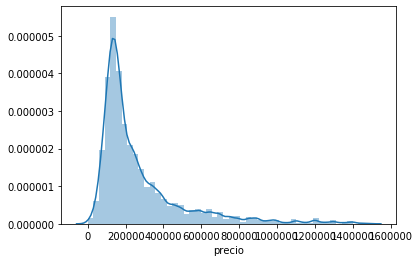

In [13]:
# Plot price distribution
f, ax = plt.subplots()
sns.distplot(df['precio'].dropna(), ax=ax)


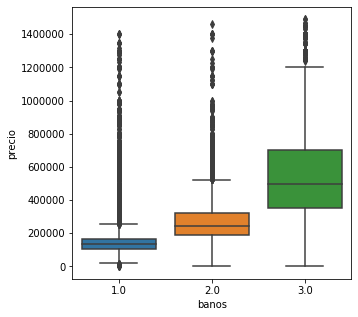

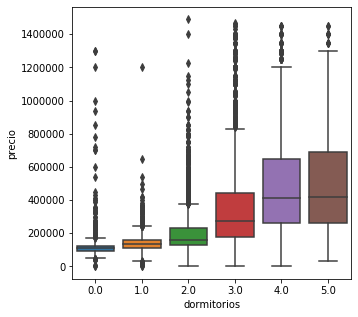

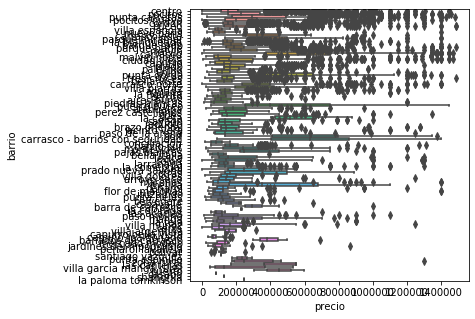

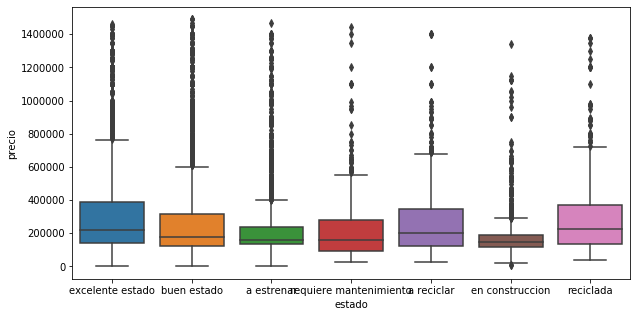

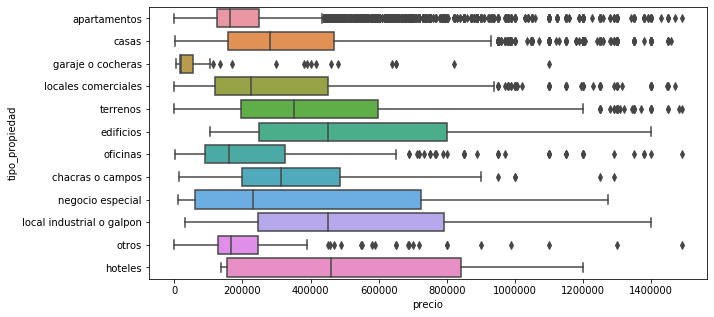

In [14]:
# Plot boxplots of price grop by some categorical feature 
# ex. estado, barrio, banos, dormitorios, tipo_propiedad

f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='banos', y='precio', data=df)

f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='dormitorios', y='precio', data=df)

f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y='barrio', x='precio', orient='h', data=df)

f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='estado', y='precio', data=df, ax=ax)

f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y='tipo_propiedad', x='precio', orient='h', data=df)

<IPython.core.display.Javascript object>


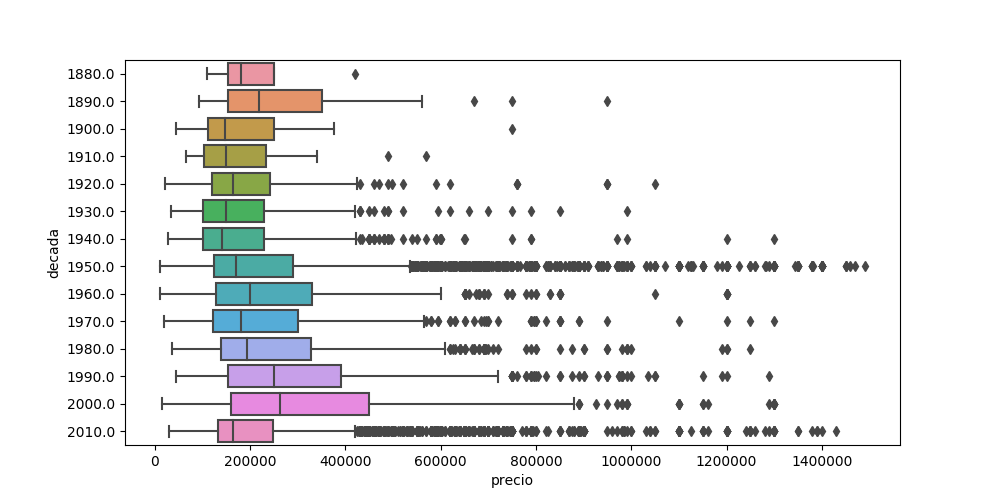

In [48]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y='decada', x='precio', orient='h', data=df_final)

<IPython.core.display.Javascript object>


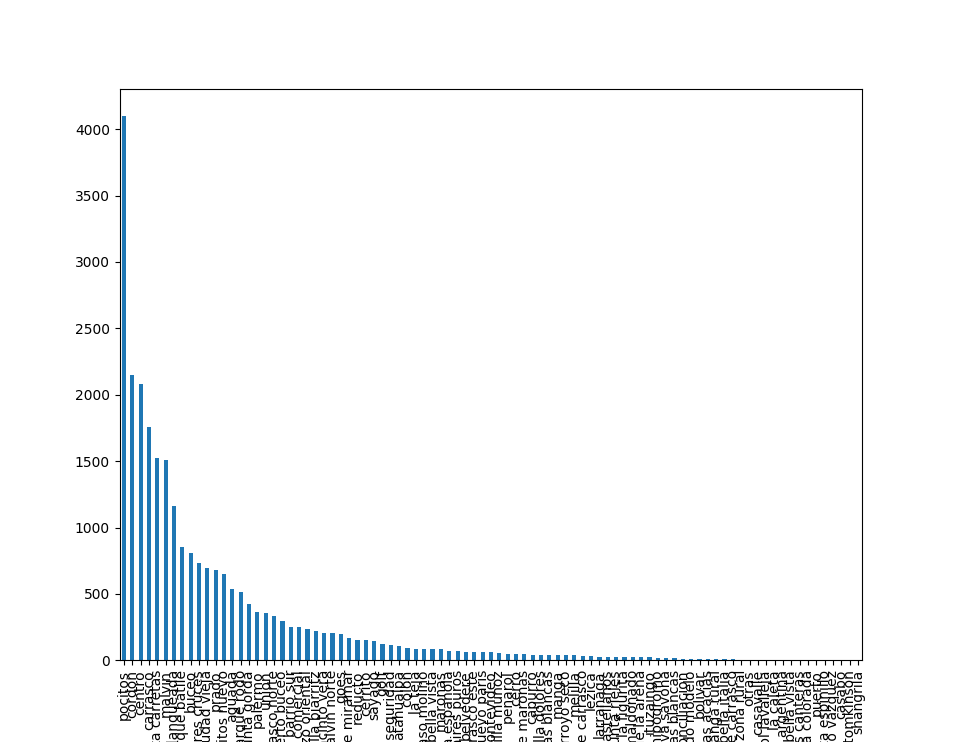

In [45]:
# Plot histogram of barrio feature
f, ax = plt.subplots()
df['barrio'].value_counts().plot(kind='bar', ax=ax)


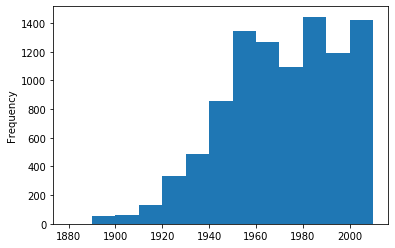

In [16]:
# Make a histogram of "ano_de_construccion" between 1880 and 2019, in bins of 10 years
df['ano_de_construccion'].plot.hist(bins=np.arange(1880, 2020, 10))


### bivarible plots
- Scatter
- Pairplot

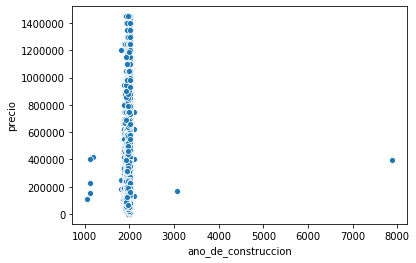

In [17]:
f, ax = plt.subplots()
sns.scatterplot(x='ano_de_construccion', y='precio', data=df, ax=ax)

In [18]:
df['gastos_comunes'].nlargest(30)

9883    10000000000000000905969664.00
714               1111111111111111.00
15006             1111111111111111.00
25537             1111111111111111.00
15001              111111111111111.00
18045                    111111111.00
1259                      11111111.00
7417                      11111111.00
1649                       1500000.00
13607                       999999.00
26301                       199041.00
1650                        150000.00
10387                       138000.00
21291                       137700.00
3800                        130000.00
22800                       123000.00
2752                        111111.00
4469                        111111.00
4544                        111111.00
7322                        111111.00
8588                        111111.00
9591                        111111.00
11298                       111111.00
11330                       111111.00
19421                       111111.00
26636                       111111.00
15660       

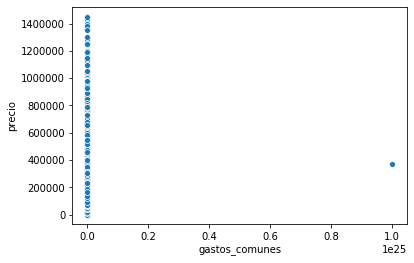

In [19]:
f, ax = plt.subplots()
sns.scatterplot(x='gastos_comunes', y='precio', data=df, ax=ax)

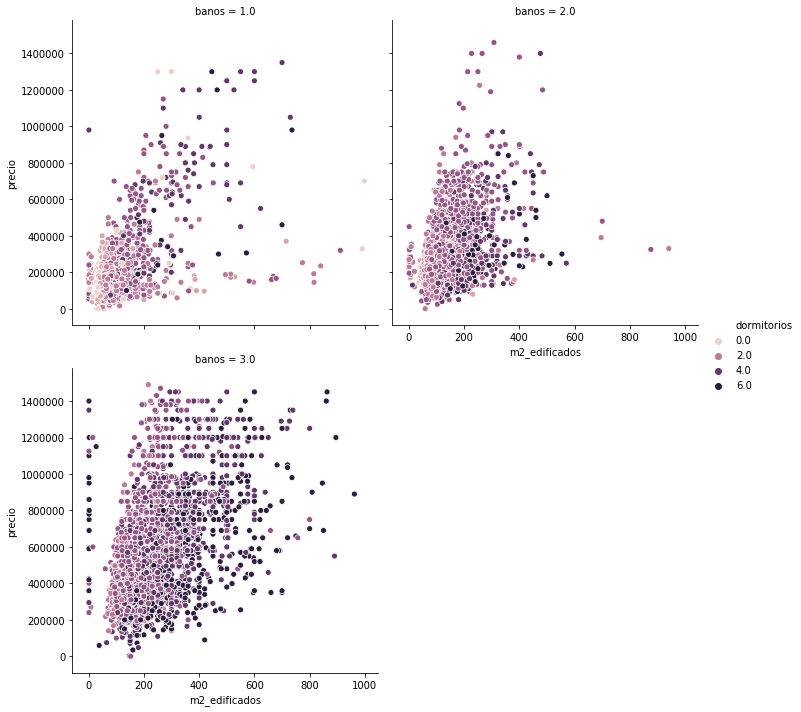

In [20]:
sns.relplot(
    x="m2_edificados", 
    y="precio",
    col="banos",
    col_wrap=2,
    hue='dormitorios',
    data=df,

)

/home/cesar/software/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cesar/software/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


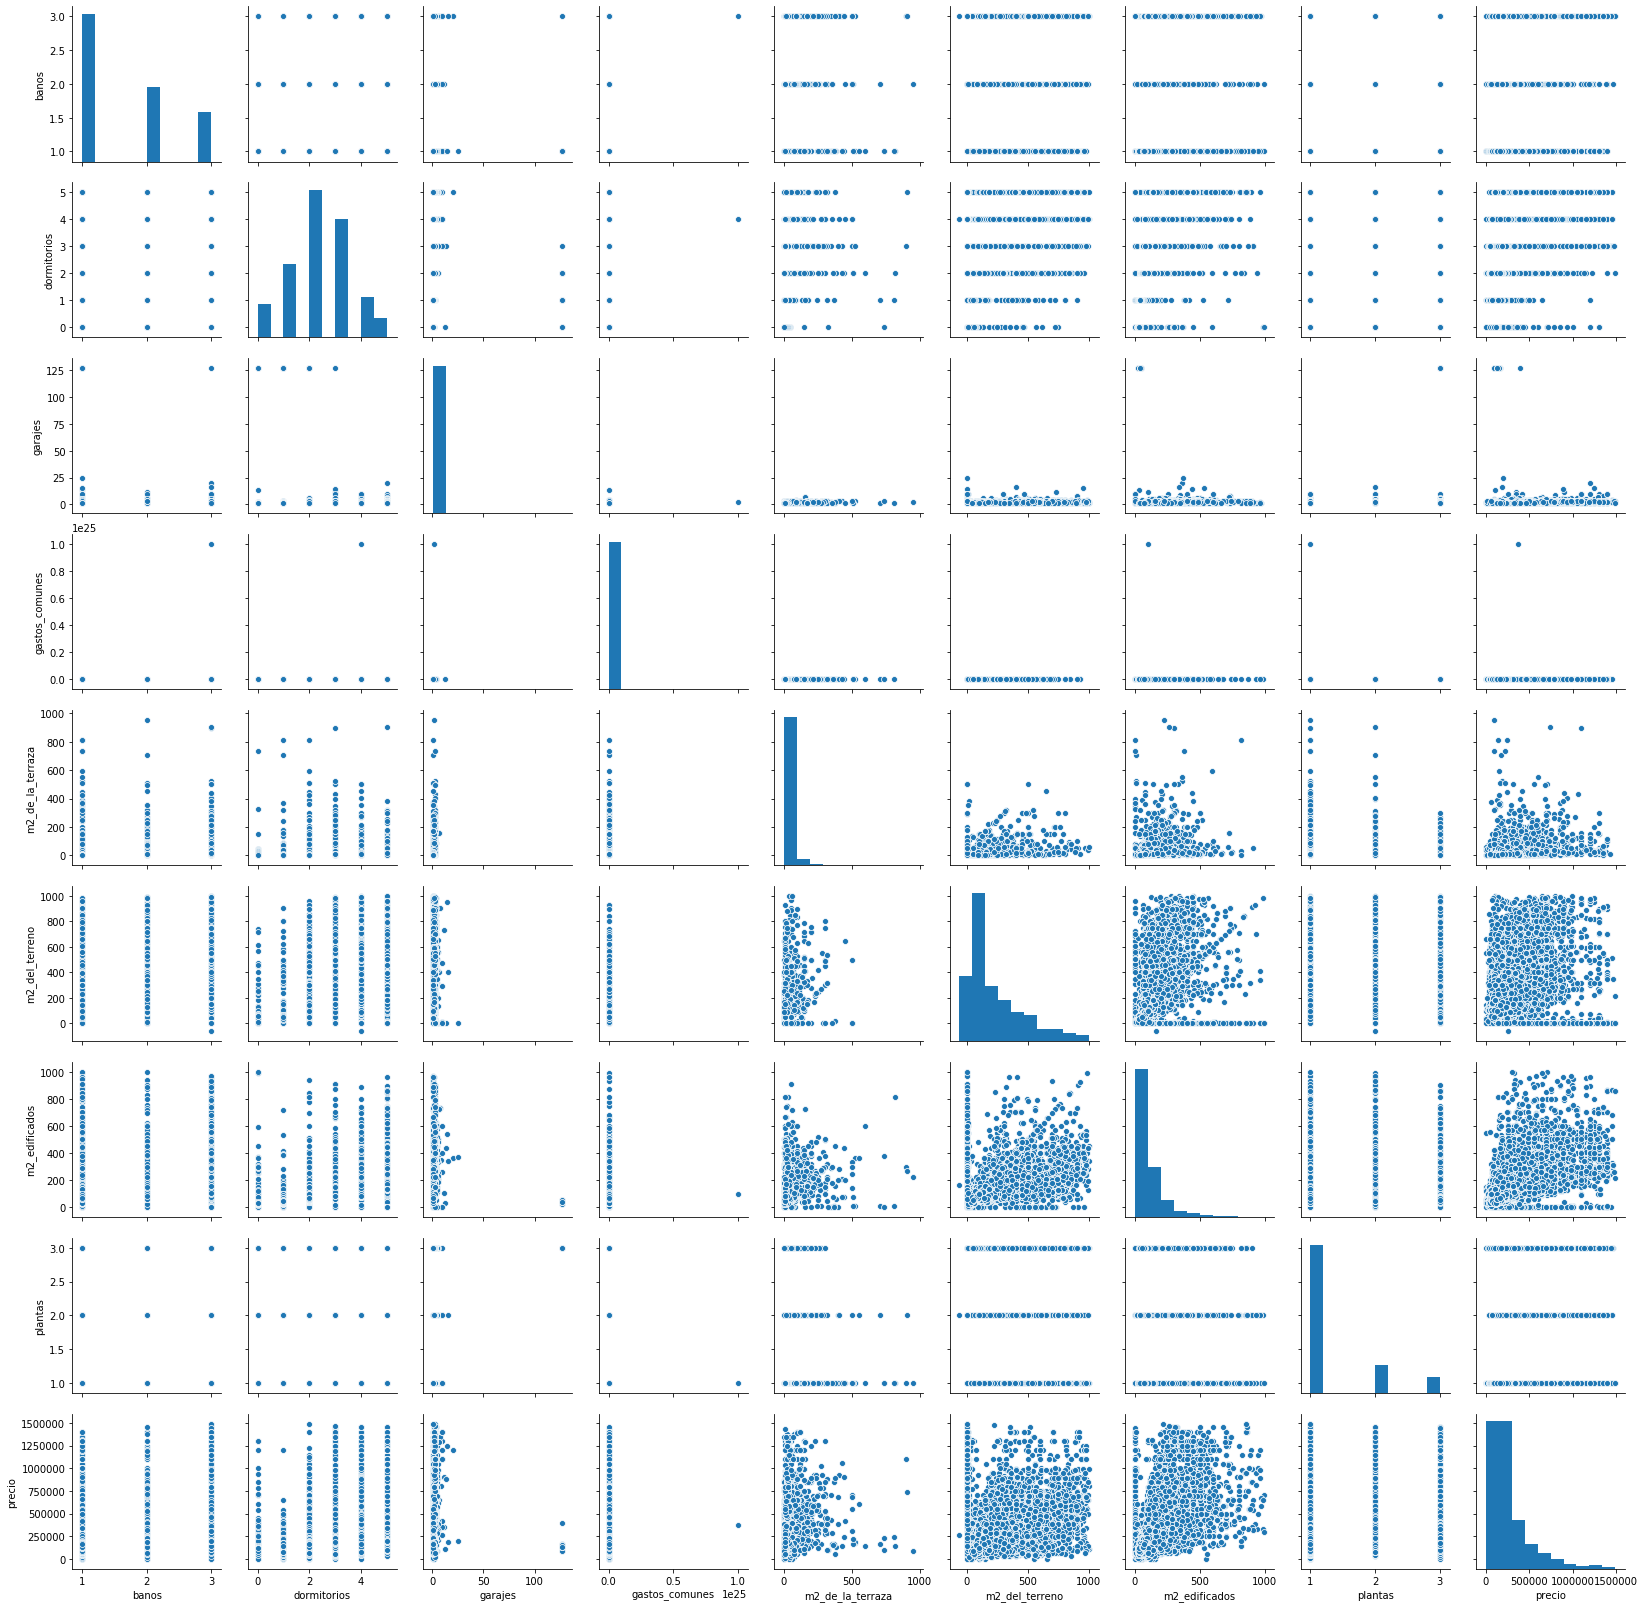

In [21]:
features = [
    'banos',
    'dormitorios',
    'garajes',
    'gastos_comunes',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'plantas',
    'precio',
]
sns.pairplot(df[features]);


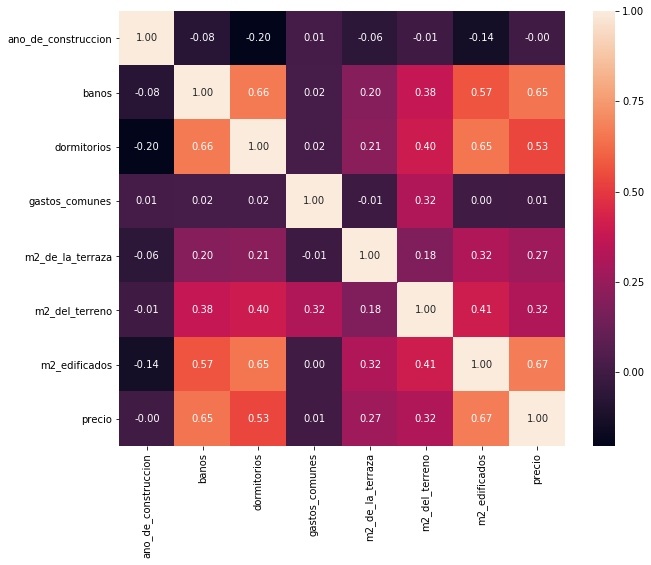

In [22]:
features = [
    'ano_de_construccion',
    'banos',
    'dormitorios',
    'gastos_comunes',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'precio',
]
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, fmt='.02f', ax=ax)

# Data prepratation

**"The quality and quantity of data that you gather will directly determine how good your predictive model can be."**

- Select relevant features
- Clean and Missing values imputetion




<table>
  <tr>
    <th>Feature selection</th>
    <th>Filling missing values</th>
  </tr>
  <tr>
    <th><img src="http://dkopczyk.quantee.co.uk/wp-content/uploads/2018/10/feat_sel-600x265.png" /></th>
    <th><img src="https://i.stack.imgur.com/E4mhD.png" /></th>
</table>


## Select feature for analysis
Check dataset [documentation](https://github.com/creyesp/houses-project/blob/add-binder-configs/data/dataset_description.md) to choice the most interesting feature to answer our questions.

In [23]:
columns_to_analyze = [
    'ano_de_construccion', 
    'banos',
    'banos_extra',
    'descripcion',
    'disposicion',
    'distancia_al_mar',
    'dormitorios',
    'dormitorios_extra',
    'estado',
    'extra',
    'garajes',
    'garajes_extra',
    'gastos_comunes',
    'tipo_de_publicacion',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'oficina',
    'penthouse',
    'plantas',
    'plantas_extra',
    'precio',
    'sobre',
    'tipo_propiedad',
    'vista_al_mar',
    'vivienda_social',
    'barrio', 
]

## Split dataset in numerical and string variables
Pandas has a method to split dataset group by dtypes:
- **'object'**: To select strings you must use the object dtype
- **'number'**: To select all numeric types
- **'category'**: To select Pandas categorical dtypes
- **'datetime'**: To select datetimes
- **'timedelta'**: To select timedeltas

In [24]:
df_num = df[columns_to_analyze].select_dtypes(include='number')
df_obj = df[columns_to_analyze].select_dtypes(include='object')

print('Numerical columns: {}\n'.format(df_num.columns.tolist()))
print('Caterorial columns: {}'.format(df_obj.columns.tolist()))

Numerical columns: ['ano_de_construccion', 'banos', 'banos_extra', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra', 'garajes', 'garajes_extra', 'gastos_comunes', 'm2_de_la_terraza', 'm2_del_terreno', 'm2_edificados', 'oficina', 'penthouse', 'plantas', 'plantas_extra', 'precio', 'vista_al_mar', 'vivienda_social']

Caterorial columns: ['descripcion', 'disposicion', 'estado', 'extra', 'tipo_de_publicacion', 'sobre', 'tipo_propiedad', 'barrio']


## Missing values imputation
Some features have only 1 valid value and the rest of the values are Nan (Not a number), ex. "oficina" column. In this case we can infer that missing value is the opossite value. 
- **Look at what feature we can replace Nan values with 0**.

There are other features that nan values should be replacing with a especifi value, ex. "plantas", if a house or apartment hasn't a valid value then default value should be 1.
- **Look at what feature we can replace Nan values with especific values**.

In [25]:
# Fill missing values with zero
fill_zero_col = [
    'm2_de_la_terraza',
    'vivienda_social',
    'gastos_comunes',
    'garajes',
    'garajes_extra',
    'plantas_extra',
    'penthouse',
    'oficina',
    'vista_al_mar',
]
df_num.loc[:, fill_zero_col] = df_num[fill_zero_col].fillna(0)

# Fill missing values with 1
df_num['plantas'].fillna(1, inplace=True)

We can infer some values of a column from other column, for example we can fill nan values in "m2_del_terreno" from "m2_edificados".
- **Select nan values from  "m2_del_terreno" and fill it with "m2_edificados".**

In [26]:
# Fill missing value usings other columns
mask_m2_terreno = df_num['m2_del_terreno'].isna()
df_num.loc[mask_m2_terreno, 'm2_del_terreno'] = df_num.loc[mask_m2_terreno, 'm2_edificados']

Also we can use some statistic metrics to fill missing values, like mean, median, mode, etc.
- **Compute the median of "m2_edificados" and fill nan values with this result.**

In [46]:
# df_num['m2_edificados'].fillna(df_num['m2_edificados'].median(), inplace=True)


For categorical feature we can add a new category to fill missing values
- **Replace nan values with a defaul category for following feature:**
    - "barrio"
    - "disposicion"
    - "tipo_propiedad"

In [28]:
# Fill missing categories
df_obj['barrio'].fillna('desconocido', inplace=True)
df_obj['disposicion'].fillna('otro', inplace=True)
df_obj['tipo_propiedad'].fillna('otros', inplace=True)

 ## Feature transformation
 

We can create new features applying some functions or filters to transform them and get a more informative features. Apply the following transformation:
- **Create a binary feature called "cerca_rambla" which is 1 when "distancia_al_mar" < 1000 or "vista_al_mar" is 1, in other case set it to 0.**
- **Create a feature called "m2_index" which is the ratio between "m2_edificados" and "m2_del_terreno"**
- **Create a binary feature called "es_casa" which is 1 if "tipo_propiedad" == 'casas' and 0 is "tipo_propiedad" == 'apartamentos'.**
- **Create a binary feature called "parrilero" if "extra" feature contain 'parrillero'**

In [29]:
df_num['cerca_rambla'] = (df_num['distancia_al_mar'] <= 1000) | (df_num['vista_al_mar'] ).astype(float)

df_num['m2_index'] = df_num['m2_edificados']/df_num['m2_del_terreno']

df_num['es_casa'] = df_obj['tipo_propiedad'].map({'casas':1, 'apartamentos': 0})

df_num['parrilero'] = df_obj['extra'].str.contains('parrillero').fillna(False)


### Binning
Some variable like years or ages is an example of a feature type that might benefit from transformation into a discrete variable.

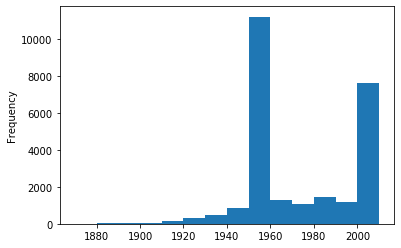

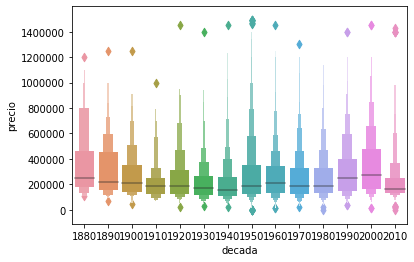

In [30]:
range_decade = np.arange(1880, 2021, 10)
range_label = np.arange(1880, 2020, 10)
year = df['ano_de_construccion'].copy()
year[year < 1880] = 1880
year[year > 2019] = 2019
year.fillna(1951, inplace=True)
df_num['decada'] = pd.cut(year,
                    bins=range_decade,
                    labels=range_label, 
                    right=False
                   ).astype(int)
df_num['decada']
f, ax = plt.subplots()
df_num['decada'].plot.hist(bins=np.arange(1870, 2020, 10), ax=ax)

f, ax = plt.subplots()
sns.boxenplot(x='decada', y='precio', data=df_num, ax=ax)

Some categorical features are ordinal, then we can map them to a numerical values in a especific order
- **Create a dictionary with all posible values of "estado" feature and assigne a numerical value, where min value is the worse status and the max value is the best status of properties. Then map these values to a "estado" feature.**

In [31]:
# Categorical transformation
map_status = {
    'en construccion': 3,
    'a estrenar': 3,
    'excelente estado': 3,
    'buen estado': 2,
    'reciclada': 2,
    'requiere mantenimiento': 1,
    'a reciclar': 0,
#     '': np.nan,
}
df_num['estado'] = df_obj['estado'].map(map_status)



One useful transformation is [80/20 rule or Pareto Rule](https://en.wikipedia.org/wiki/Pareto_principle), it's say that  for many events, roughly 80% of the effects come from 20% of the causes. In our case "barrio" feature has a similar behaviour.  
<img src="https://www.dansilvestre.com/wp-content/uploads/2017/12/DanSilvestre.com_-1.png" width="50%"/>

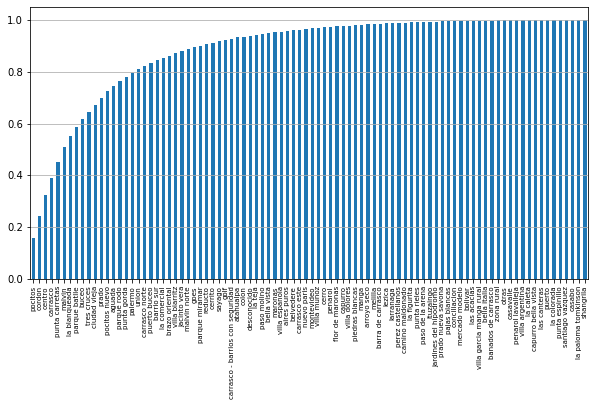

In [32]:
f, ax = plt.subplots(figsize=(10,5))
(df_obj['barrio'].value_counts().cumsum()/df_obj['barrio'].count()).plot(kind='bar', ax=ax)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize('x-small') 
ax.grid(axis='y')

Nominal features like "barrio" can be transformed to a numerical varable applying **ONE-HOT encoding**.
<img src="img/one-hot-encoding.png" />

- **Apply one-hot encoding on Pareto's transformation of "bario" feature and add prefix='ZN_', then assign to zona variable.**
- **Apply one-hot encoding on "disposicion" feature and add prefix='DISP_', then assign to zona disp.**

In [33]:
zona = pd.get_dummies(handson.pareto_rule(df_obj['barrio']), prefix='ZN_',)
disp = pd.get_dummies(df_obj['disposicion'], prefix='DISP_')

Finally concatenate all new features and drop redundant 

In [34]:
df_num_final = pd.concat([df_num, zona, disp], axis=1)
drop_col = ['distancia_al_mar', 'vista_al_mar', 'm2_del_terreno', 'ano_de_construccion']
df_num_final.drop(columns=drop_col, inplace=True)

## Apply customs filters

In [35]:
df_num_final.quantile([0.05, 0.95])

,banos,banos_extra,dormitorios,dormitorios_extra,garajes,garajes_extra,gastos_comunes,m2_de_la_terraza,m2_edificados,oficina,penthouse,plantas,plantas_extra,precio,vivienda_social,cerca_rambla,m2_index,es_casa,parrilero,decada,estado,ZN__aguada,ZN__buceo,ZN__carrasco,ZN__centro,ZN__ciudad vieja,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__palermo,ZN__parque batlle,ZN__parque rodo,ZN__pocitos,ZN__pocitos nuevo,ZN__prado,ZN__punta carretas,ZN__punta gorda,ZN__tres cruces,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral,DISP__otro
0.05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.00,0.00,0.00,1.00,0.00,76000.00,0.00,0.00,0.35,0.00,0.00,1940.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.95,3.00,1.00,4.00,0.00,2.00,0.00,16500.00,40.00,323.00,1.00,0.00,3.00,1.00,760000.00,1.00,1.00,1.48,1.00,1.00,2010.00,3.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00


In [36]:
mask = (
    (df_num_final.fillna(0) >= 0).all(axis=1)
    & df_obj['tipo_propiedad'].isin(['apartamentos', 'casas'])
    & (df_num_final['decada'].between(1880, 2019))
    & (df_num_final['oficina'] != 1)
    & (df_num_final['penthouse'] != 1) 
    & (df_num_final['banos'].between(1, 3))
    & (df_num_final['dormitorios'].between(0, 5))
    & (df_num_final['garajes'].between(0, 5))
    & (df_num_final['m2_de_la_terraza'].between(0, 400))
    & (df_num_final['m2_edificados'] >= 10)
    & (df_num_final['gastos_comunes'].between(0, 5e4))
    & (df_num_final['precio'].between(1e4, 2e6))
    & (df_num_final['m2_index'].between(0, 4))
)
mask.sum()

18035

## Drop no informative columns and drop missing row

In [37]:
zero_std_col = df_num_final.columns[df_num_final[mask].std() == 0]
df_final = df_num_final[mask].drop(columns=zero_std_col).astype(float).dropna()


In [38]:
handson.info(df_final)

,dtypes,isnull,%null,nunique
banos,float64,False,0.00,3
banos_extra,float64,False,0.00,2
dormitorios,float64,False,0.00,6
dormitorios_extra,float64,False,0.00,2
garajes,float64,False,0.00,6
garajes_extra,float64,False,0.00,2
gastos_comunes,float64,False,0.00,733
m2_de_la_terraza,float64,False,0.00,181
m2_edificados,float64,False,0.00,473
plantas,float64,False,0.00,3


In [39]:
df_final.describe()

,banos,banos_extra,dormitorios,dormitorios_extra,garajes,garajes_extra,gastos_comunes,m2_de_la_terraza,m2_edificados,plantas,plantas_extra,precio,vivienda_social,cerca_rambla,m2_index,es_casa,parrilero,decada,estado,ZN__aguada,ZN__buceo,ZN__carrasco,ZN__centro,ZN__ciudad vieja,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__palermo,ZN__parque batlle,ZN__parque rodo,ZN__pocitos,ZN__pocitos nuevo,ZN__prado,ZN__punta carretas,ZN__punta gorda,ZN__tres cruces,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral,DISP__otro
count,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00,17957.00
mean,1.62,0.17,2.24,0.03,0.60,0.03,3565.26,6.26,102.18,1.21,0.06,248221.98,0.07,0.20,0.94,0.23,0.31,1971.32,2.45,0.02,0.03,0.07,0.07,0.01,0.08,0.05,0.06,0.20,0.01,0.04,0.02,0.17,0.03,0.03,0.06,0.02,0.03,0.62,0.08,0.03,0.02,0.25
std,0.76,0.37,1.15,0.18,0.80,0.16,6382.68,21.57,81.91,0.53,0.23,198842.46,0.25,0.40,0.24,0.42,0.46,27.83,0.66,0.14,0.18,0.25,0.25,0.11,0.28,0.22,0.24,0.40,0.12,0.18,0.14,0.38,0.16,0.17,0.24,0.13,0.17,0.49,0.28,0.17,0.14,0.43
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,0.00,11250.00,0.00,0.00,0.05,0.00,0.00,1880.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,53.00,1.00,0.00,129000.00,0.00,0.00,1.00,0.00,0.00,1950.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,2.00,0.00,0.00,0.00,1.00,0.00,74.00,1.00,0.00,175000.00,0.00,0.00,1.00,0.00,0.00,1960.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,2.00,0.00,3.00,0.00,1.00,0.00,4300.00,3.00,120.00,1.00,0.00,290000.00,0.00,0.00,1.00,0.00,1.00,2010.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,3.00,1.00,5.00,1.00,5.00,1.00,50000.00,400.00,941.00,3.00,1.00,1490000.00,1.00,1.00,4.00,1.00,1.00,2010.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Save ready dataset 

In [40]:
df_final.to_csv('../data/ready/dataset_houses.csv', index=False)